Опис датафрейму:

+ **PassengerId**: Унікальний ідентифікатор пасажира.
+ **Survived**: Цей атрибут позначає, чи вижив пасажир. Зазвичай 0 означає, що пасажир не вижив, а 1 - що вижив.
+ **Pclass**: Клас квитка, який придбав пасажир. Має три категорії: 1 - перший клас, 2 - другий клас, 3 - третій клас.
+ **Name**: Ім'я пасажира.
+ **Sex**: Стать пасажира (чоловік або жінка).
+ **Age**: Вік пасажира.
+ **SibSp**: Кількість братів, сестер, дружин чи чоловіків, які подорожують разом з пасажиром.
+ **Parch**: Кількість батьків або дітей, які подорожують разом з пасажиром.
+ **Ticket**: Номер квитка.
+ **Fare**: Вартість квитка.
+ **Cabin**: Номер каюти, в якій перебував пасажир.
+ **Embarked**: Порт, з якого пасажир посадився на корабель (C - Cherbourg, Q - Queenstown, S - Southampton).

**Завдання: навчити дерево рішень, яке передбачатиме вижив пасажир або загину, ґрунтуючись на даних пасажирів з датасету titanic.csv.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#sns.set_theme(style="whitegrid")
#sns.set(font_scale=1.5)
import matplotlib.pyplot as plt

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:

len(dataset)

891

**Задача 1:** Який відсоток виживання серед чоловіків / жінок?

In [25]:
female_perc = len(dataset[(dataset['Sex'] == 'female') & (dataset['Survived'] == 1)] ) / len(dataset[dataset['Sex'] == 'female'])
male_perc = len(dataset[(dataset['Sex'] == 'male') & (dataset['Survived'] == 1)]) / len(dataset[dataset['Sex'] == 'male'])
print('Survived:\nfemale: ', female_perc, '\n', 'male: ', male_perc)

Survived:
female:  0.7420382165605095 
 male:  0.18890814558058924


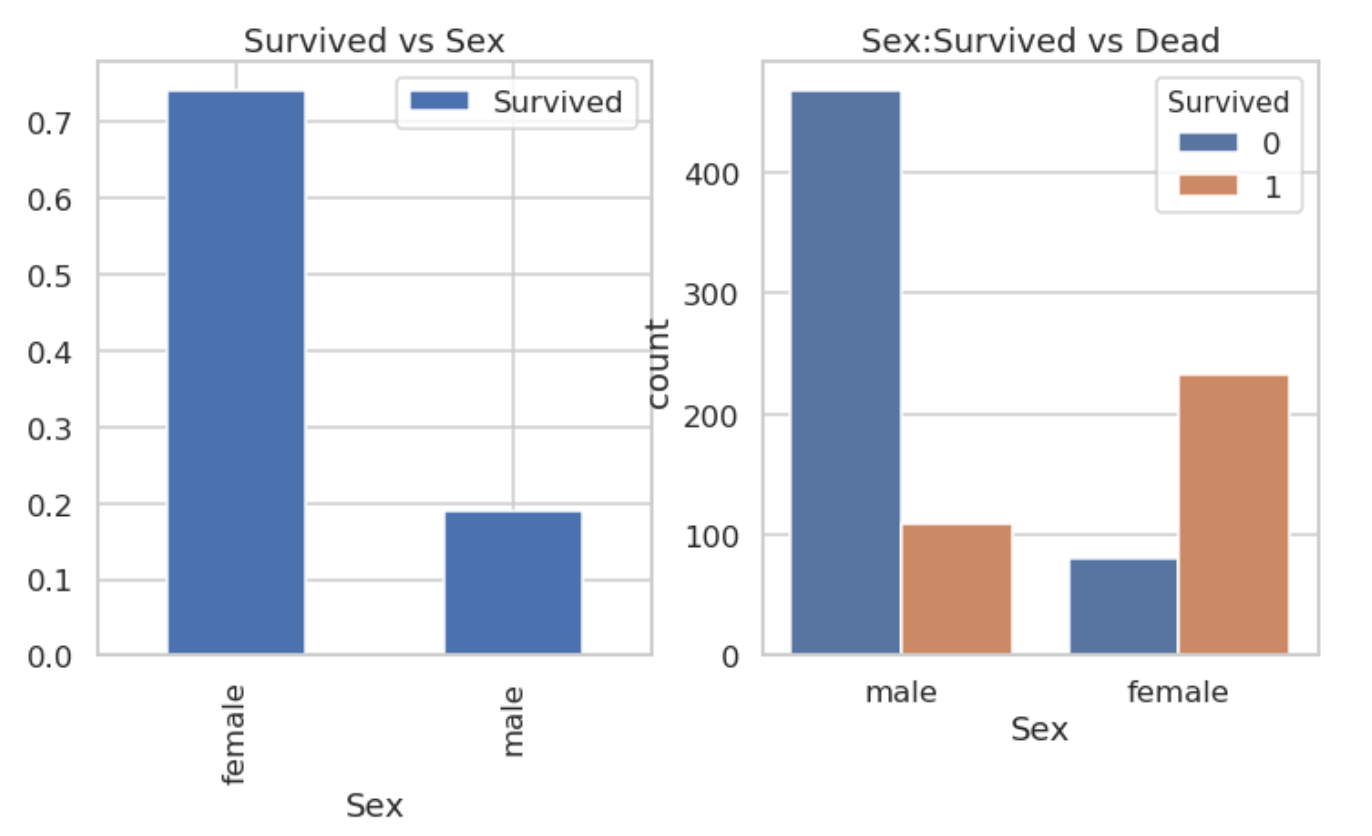

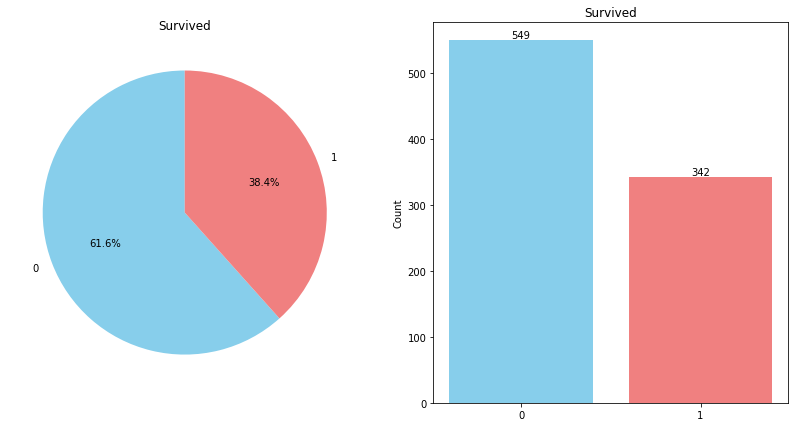

[0 1]


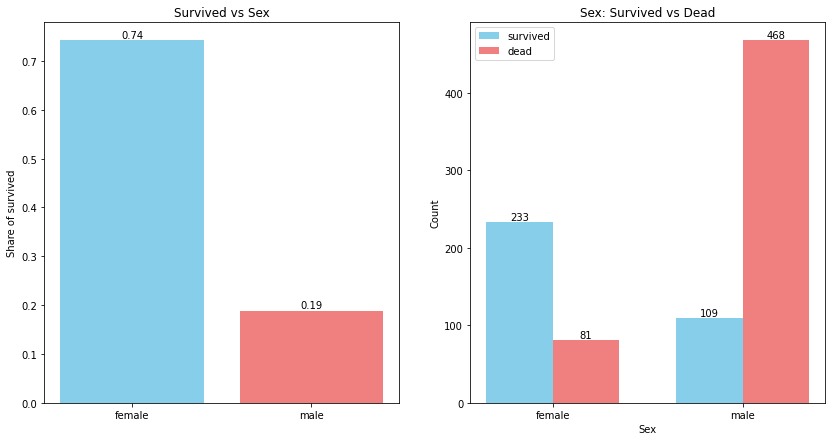

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # Adjust the figure size as needed

#plt.figure(figsize=(7, 7))  # Set the figure size (optional)
axes[0].pie([len(dataset[dataset['Survived'] == 0]), len(dataset[dataset['Survived'] == 1])], labels=['0', '1'], autopct='%1.1f%%', startangle=90, colors = ['skyblue', 'lightcoral'])
axes[0].set_title('Survived')
#plt.show()

bar_container = axes[1].bar(['0', '1'], [len(dataset[dataset['Survived'] == 0]), len(dataset[dataset['Survived'] == 1])],
             color = ['skyblue', 'lightcoral'])
axes[1].set_ylabel('Count') 
axes[1].set_title('Survived') 
axes[1].bar_label(bar_container, fmt = '{:,.0f}')
plt.show()  

fig, axes = plt.subplots(1, 2, figsize=(14, 7)) 
bar_container = axes[0].bar(['female', 'male'], [female_perc, male_perc], color = ['skyblue', 'lightcoral'])  
#axes[1].set_xlabel('Sex') 
axes[0].set_ylabel('Share of survived') 
axes[0].set_title('Survived vs Sex') 
axes[0].bar_label(bar_container, fmt = '{:,.2f}')

survived_group = [len(dataset[(dataset['Sex'] == 'female') & (dataset['Survived'] == 1)] ), len(dataset[(dataset['Sex'] == 'male') & (dataset['Survived'] == 1)])]
unSurvived_group = [len(dataset[(dataset['Sex'] == 'female') & (dataset['Survived'] == 0)] ), len(dataset[(dataset['Sex'] == 'male') & (dataset['Survived'] == 0)])]
bar_width = 0.35
x = np.arange(2)
print(x)
# Створення подвійної стовпчикової діаграми
bar_container_1 = axes[1].bar( x - bar_width/2, survived_group, bar_width, color='skyblue', label = 'survived')
bar_container_2 = axes[1].bar( x + bar_width/2, unSurvived_group, bar_width, color='lightcoral', label = 'dead')
axes[1].bar_label( bar_container_2 )
axes[1].bar_label( bar_container_1)

plt.xticks(x, ['female', 'male'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex: Survived vs Dead')
plt.legend()
#axes[1].bar_label( ['female', 'male'])
plt.bar
plt.show() 


Прокоментуйте побудовані графіки

З діаграм бачимо, що з 891 пасажира, дані яких ми маємо в таблиці, 38.4% (342) людей вижили, а 61.6%(549) - загинули. Також бачимо, що з усіх жінок вижили 74%, а серед чоловіків - лише 19%. Загинуло 468 чоловіків, при тому що вижило лише 109, а з жінок загинула 81, вижили 233.

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних?

In [27]:
#print(dataset.info())
print(dataset.isnull().sum())

PassengerID      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі.

In [28]:
text = "Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin)"

# Шукаємо слово в дужках, якщо вони є
pattern = r'\(([^\s]+).*\)'#|\.\s*([^\s]+)'
names = pd.DataFrame()
names[0] = dataset['Name'].str.extract(pattern)
# Якщо дужок нема, то ім'я знаходиться після крапки
pattern = r'\.\s*([^\s]+)'
names[1] = dataset['Name'].str.extract(pattern)
names[0].fillna(names[1], inplace=True)
names = names.drop(labels = 1, axis = 1)
#print(names)

# Extract the word after the first '. ' in the 'Name' column and create a new column 'Title'
print("Top women's names:")
print(names[dataset['Sex'] == 'female'].value_counts().head(3), '\n')

#Mr. Miss. Rev. Mrs.

Top women's names:
Anna         15
Mary         14
Elizabeth    11
Name: count, dtype: int64 



**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі.

In [29]:
print("Top men's names:")
print(names[dataset['Sex'] == 'male'].value_counts().head(3))


Top men's names:
William    35
John       23
Thomas     13
Name: count, dtype: int64


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.

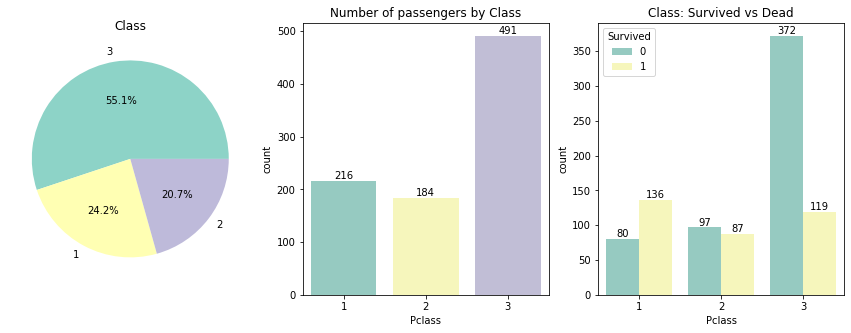

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

sns.set_palette('Set3')
classes_count = dataset['Pclass'].value_counts()
axes[0].pie(classes_count, labels = classes_count.index, autopct='%1.1f%%')
axes[0].set_title('Class')

sns.barplot( x = classes_count.index, y = classes_count, errorbar=None, ax = axes[1])
axes[1].bar_label(axes[1].containers[0])
axes[1].set_title('Number of passengers by Class')

passenger_counts = dataset.groupby(['Pclass', 'Survived']).size().reset_index(name='count')
sns.barplot( x='Pclass', y='count', hue='Survived', data=passenger_counts, errorbar=None, ax = axes[2])
axes[2].bar_label(axes[2].containers[0])
axes[2].bar_label(axes[2].containers[1])

axes[2].set_title('Class: Survived vs Dead')
#sns.barplot(x='Class', y='Count', hue='Gender', data=passenger_counts)



plt.show()

Прокоментуйте побудовані графіки

З діаграм бачимо, що більшість пасажирів мали квитки 3 класу (55.1%). 1 клас був у 216 людей, 2 клас - у 184 і третій - у 491 людини. Якщо аналізувати рівень виживання за класами квитків, то більшість людей з квитками 1 класу вижили (136 проти 80 загиблих), з другого вижили майже половина (87 проти 97), а от серед пасажирів 3 класу вижило лише 119, а 372 загинуло.

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
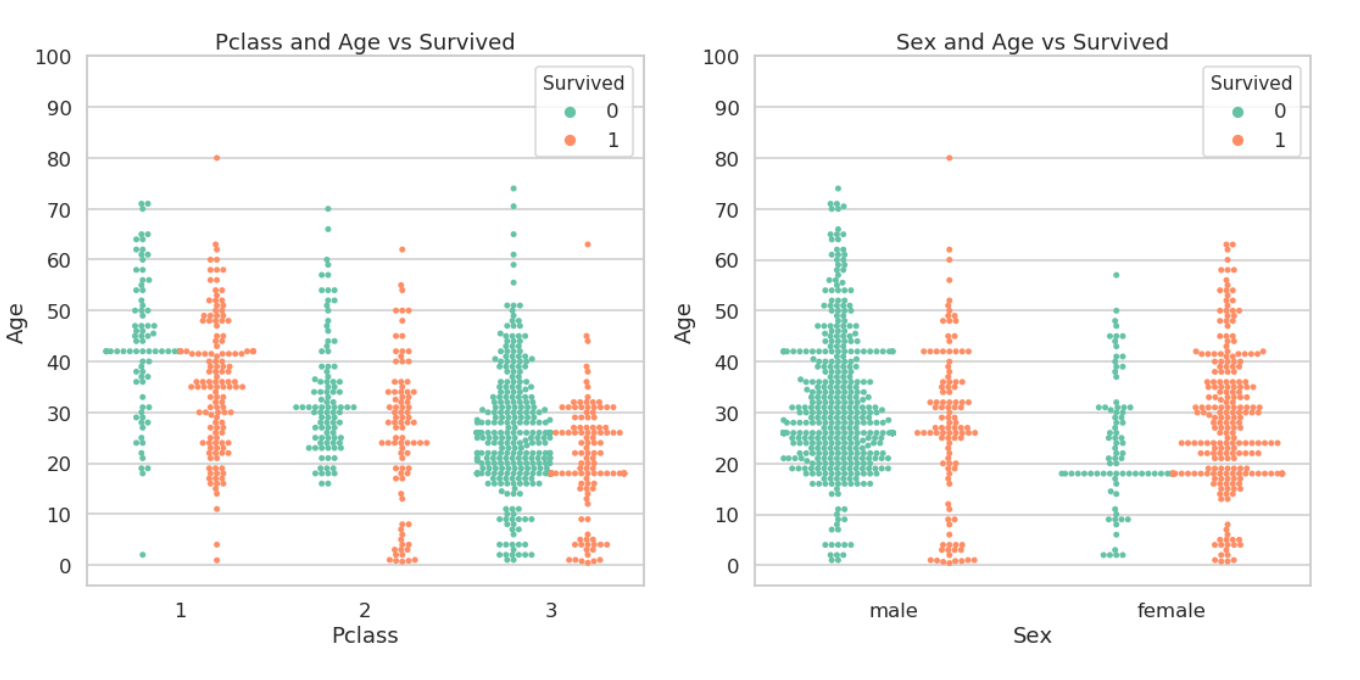![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

Text(0.5, 1.0, 'Sex and Age: Survived')

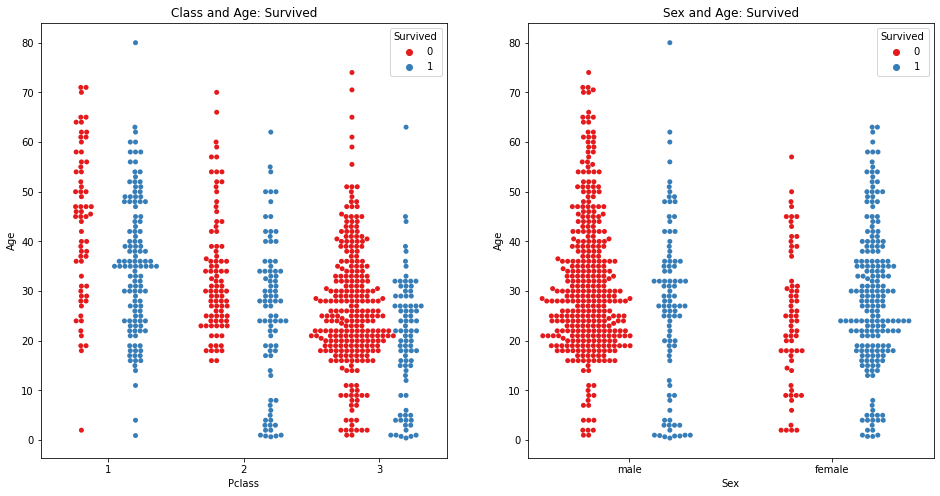

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) 
sns.set_palette('Set1')
sns.swarmplot( data=dataset,  x="Pclass", y="Age", hue = "Survived", dodge = True, ax = axes[0])
sns.swarmplot( data=dataset,  x="Sex", y="Age", hue = "Survived", dodge = True, ax = axes[1])
axes[0].set_title('Class and Age: Survived')
axes[1].set_title('Sex and Age: Survived')


In [64]:
passenger_counts = dataset[(dataset['Pclass'] == 1) & (dataset['Survived'] == 0) & (dataset['Age'] <45) & (dataset['Age'] >40)]
passenger_counts[["Age", "Pclass", "Survived"]]

,Age,Pclass,Survived
35,42.0,1,0
245,44.0,1,0


Прокоментуйте побудовані графіки

На першому графіку бачимо розподіл виживання людей залежно від їх віку і класу квитка. Бачимо, що найбільше загиблих в 3 класі віком від 15 до 45. Також діти до 15 років в 1 і 2 класах вижили, за винятком однієї, натомість в 3 класі вижило менше половини дітей.  Бачимо також, що в усіх класах старші люди частіше гинули.
На другому графіку видно, що більшість людей зі списку були віком від 15 до 45. Також бачимо, що загинуло багато чоловіків віком в основному від 15 до 50, а також більшість жінок вижили.

C:\Users\Тетяна\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Тетяна\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


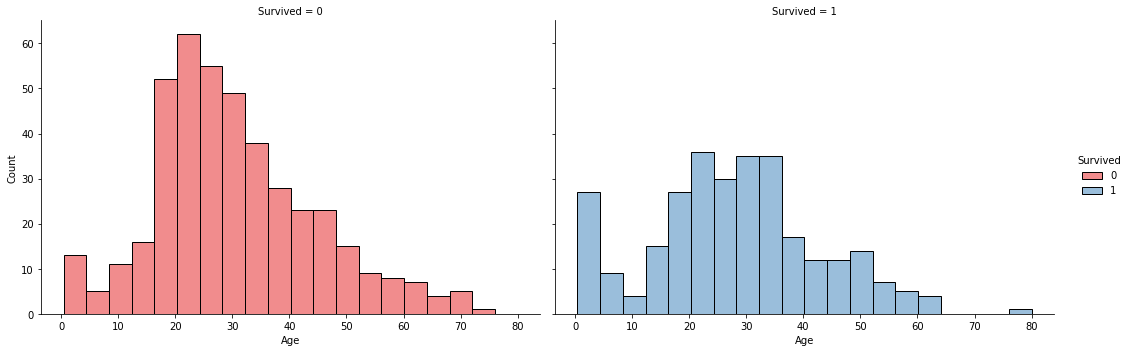

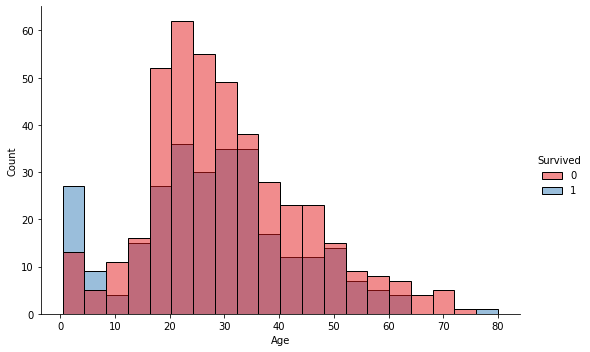

In [4]:
#fig, axes = plt.subplots(figsize=(18, 8)) 
sns.set_palette('Set1')
sns.displot(data=dataset, x="Age", col="Survived", hue="Survived", aspect = 1.5)
sns.displot(data=dataset, x="Age", hue="Survived", aspect = 1.5)



Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?


З гістограм видно, що більшість людей на Титаніку мали вік 15-40 років. Можемо побачити, загалом високу кількість дітей до 5 років порівняно з іншими. Цей скачок помітно і на діаграмі загиблих і тих, хто вижив. З діаграм важко оцінити статистичні оцінки, можна лише побачити, що обидва розподіли скошені вліво, а справа мають "хвіст".

**Задача 9:** Побудуйте діаграми та проведіть аналітику шансів на виживання серед пасажирів:  


Text(0.5, 1.0, 'Number of passengers by Embarked')

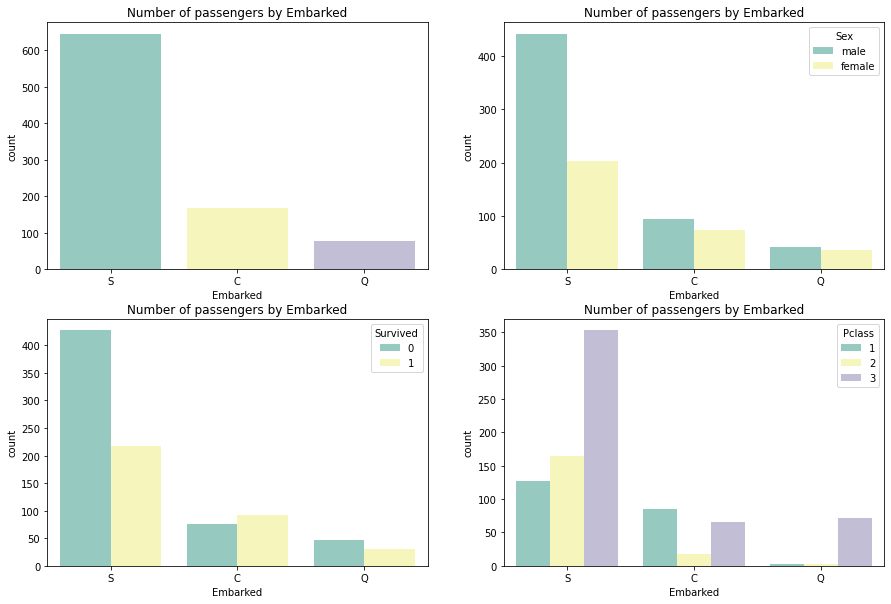

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 1 row, 3 columns

sns.set_palette('Set3')

sns.countplot(x='Embarked', data=dataset, palette='Set3', ax = axes[0][0])
axes[0][0].set_title('Number of passengers by Embarked')

sns.countplot(x='Embarked', data=dataset, hue = 'Sex', palette='Set3', ax = axes[0][1])
axes[0][1].set_title('Number of passengers by Embarked')

sns.countplot(x='Embarked', data=dataset, hue = 'Survived', palette='Set3', ax = axes[1][0])
axes[1][0].set_title('Number of passengers by Embarked')

sns.countplot(x='Embarked', data=dataset, hue = 'Pclass', palette='Set3', ax = axes[1][1])
axes[1][1].set_title('Number of passengers by Embarked')


На графіках вище можна побачити розподіл пасажирів Титаніка за портами, де вони здійснили на нього посадку (S - Southampton, C - Cherbourg, Q - Queenstown). Бачимо, що більшість пасажирів були з Southampton - більше 600, з Cherbourg більше 150 і з Queenstown менше 100. Чоловіків, очікувано, більше по всіх портах, але на першому (Southampton) їх кількість значно перевищує кількість жінок - більш ніж в 2 рази.
А от рівень виживання пасажирів з першого порту найнижчий, можливо це пов'язано з тим, що більшість цих пасажирів мали квитки 3 класу, а як ми раніше побачили, серез них виживання було найменшим. Також видно, що 2 порт - Cherbourg вирізняється тим, що більшість пасажирів, що здійснили там посадку, вижили. Ймовірно, це корелює з тим, що серед них найбільше було людей з 1 класу.

In [15]:
dataset

,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


***Задача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

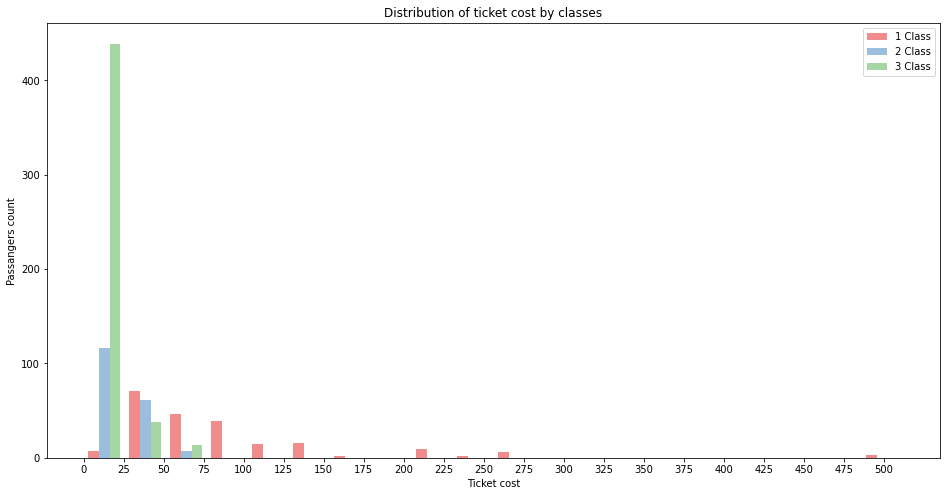

In [16]:
first_class = dataset[dataset['Pclass'] == 1]['Fare']
second_class = dataset[dataset['Pclass'] == 2]['Fare']
third_class = dataset[dataset['Pclass'] == 3]['Fare']

plt.figure(figsize=(16, 8))
plt.hist([first_class, second_class, third_class], bins=20, alpha=0.5, label=['1 Class', '2 Class', '3 Class'])
plt.title('Distribution of ticket cost by classes')
plt.xlabel('Ticket cost')
plt.ylabel('Passangers count')
plt.legend()
plt.xticks(np.arange(0, max(dataset['Fare'])+1, 25))  # Змініть крок на бажаний
plt.show()


Прокоментуйте побудовані графіки

Бачимо, що ціна квитка залежала від класу квитка. Що логічно, перший клас найдорожчий, там навіть були квитки вартістю до 500, хоча це дуже вибивається із загальної картини. Також 1 клас утворює "хвіст" з цінами більше 150, хоча й кількість таких квитків не велика. Але цікаво, що навіть в 1 класі були квитки ціною 0-25, хоча цю вартість мали більшість квитків 3 класу. Але загалом тенденція проглядається - квитки 3 класу мали найнижчу ціну (0-75). Хоча ціни квитків 2 класу теж в цих межах, але в інтервалі [0-25] їх не так багато, як 1, а в [25-50] їх більше ніж 1 класу. Можна зробити висновки, що вартість квитка залежала не лише від класу (можливо, ще від відстані, яку мав подолати пасажир на Титаніку)